## Machine Learning Model for Predicting "Sold Price"
#### We are creating a Multiple Linear Regression machine learning model to predict "Sold Price" of a house based on type, style, bedrooms, washrooms, list price, date, and some other parameters. This will help prespective buyers to bid for the house.

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 

In [2]:
# Importing the data from SQLite database into a DataFrame
house_df = pd.read_sql_table('sold_homes', 'sqlite:///sold_homes.db').drop(columns=['index'])
house_df.head()

,#,LSC,EC,St#,Street Name,Abbr,Dir,Municipality,Community,List Price,...,Fam,Kit,Garage Type,A/C,Heat,Contract Date,Sold Date,List Brokerage,Co op Brokerage,MLS#
0,1,Sld,None,38,Scarsdale,Crt,None,Brampton,Brampton W,"$599,000",...,N,1,Built-,Cen,Gas,3/16/2021,3/23/2021,RE/MAX WEST,RE/MAX REALTY,W5153139
1,2,Sld,None,55,Corby,Cres,None,Brampton,Brampton W,"$599,900",...,N,1,None,Cen,Oil,2/23/2021,2/26/2021,RE/MAX REAL,HOMELIFE/MIRA,W5125388
2,3,Sld,None,7,Manett,Cres,None,Brampton,Brampton W,"$699,000",...,N,1,Attach,Cen,Gas,1/21/2021,1/26/2021,RE/MAX REAL,HOMELIFE/MIRA,W5091089
3,4,Sld,None,76,Fairglen,Ave,None,Brampton,Brampton W,"$699,500",...,N,1,None,Cen,Gas,3/16/2021,3/17/2021,"EXP REALTY,",ROYALSTARRE,W5153813
4,5,Sld,None,121,Richwood,Cres,None,Brampton,Brampton W,"$699,900",...,N,1,Built-,Cen,Gas,2/21/2021,2/26/2021,RE/MAX REAL,ROYAL LEPAGE,W5123258


In [3]:
# Checking date types of columns
house_df.dtypes

#                   int64
LSC                object
EC                 object
St#                object
Street Name        object
Abbr               object
Dir                object
Municipality       object
Community          object
List Price         object
Sold Price         object
Type               object
Style              object
Br                  int64
Additional          int64
Wr                  int64
Fam                object
Kit                 int64
Garage Type        object
A/C                object
Heat               object
Contract Date      object
Sold Date          object
List Brokerage     object
Co op Brokerage    object
MLS#               object
dtype: object

### Data Preprocessing and Preliminary Features Selection

* In this part, we have tested and dropped the columns are not beneficial to the machine learning model or which reduce the performance of machine learning model. For this, we used Exhaustive Feature Selection which is one of the Wrapper Methods.
* Changed datatype of some of the columns (currency, dates) to intergers so that they can be used in machine learning model
* Encoded the columns which can not be directly converted to numeric values. Also, checked if bucketing is required in such columns

In [4]:
# Drop the non-beneficial columns
house_df = house_df.drop(["#","LSC","EC","St#","Dir","Municipality","Community","MLS#","Abbr","List Brokerage","Co op Brokerage","Street Name","Heat","A/C"],1)
house_df.head()

,List Price,Sold Price,Type,Style,Br,Additional,Wr,Fam,Kit,Garage Type,Contract Date,Sold Date
0,"$599,000","$681,000",Att/Row/Tw,2-Storey,3,0,2,N,1,Built-,3/16/2021,3/23/2021
1,"$599,900","$767,000",Semi-Detac,Bungalow,3,1,2,N,1,None,2/23/2021,2/26/2021
2,"$699,000","$818,500",Att/Row/Tw,2-Storey,3,1,3,N,1,Attach,1/21/2021,1/26/2021
3,"$699,500","$726,000",Semi-Detac,Bungalow,2,1,2,N,1,None,3/16/2021,3/17/2021
4,"$699,900","$731,000",Att/Row/Tw,2-Storey,3,0,3,N,1,Built-,2/21/2021,2/26/2021


#### At this point, 11 columns or features remain in the dataset: "List Price", "Sold Price", "Type", "Style", "Br"(bedrooms),	"Additional"(additional rooms), "Wr"(washrooms), "Fam", "Kit"(kitchen), "Garage Type", "Contract Date", "Sold Date" 

In [5]:
# Converting "List Price" and "Sold Price" to integer type
house_df["List Price"] = house_df["List Price"].replace('[\$,]', '', regex=True).astype(int)
house_df["Sold Price"] = house_df["Sold Price"].replace('[\$,]', '', regex=True).astype(int)
house_df.head()

,List Price,Sold Price,Type,Style,Br,Additional,Wr,Fam,Kit,Garage Type,Contract Date,Sold Date
0,599000,681000,Att/Row/Tw,2-Storey,3,0,2,N,1,Built-,3/16/2021,3/23/2021
1,599900,767000,Semi-Detac,Bungalow,3,1,2,N,1,None,2/23/2021,2/26/2021
2,699000,818500,Att/Row/Tw,2-Storey,3,1,3,N,1,Attach,1/21/2021,1/26/2021
3,699500,726000,Semi-Detac,Bungalow,2,1,2,N,1,None,3/16/2021,3/17/2021
4,699900,731000,Att/Row/Tw,2-Storey,3,0,3,N,1,Built-,2/21/2021,2/26/2021


In [6]:
# Converting the 'Contract Date' and 'Sold Date' to interger type
house_df['Contract Date'] = house_df['Contract Date'].replace('[\/]', '', regex=True).astype(int) 
house_df['Sold Date'] = house_df['Sold Date'].replace('[\/]', '', regex=True).astype(int)
house_df.head()

,List Price,Sold Price,Type,Style,Br,Additional,Wr,Fam,Kit,Garage Type,Contract Date,Sold Date
0,599000,681000,Att/Row/Tw,2-Storey,3,0,2,N,1,Built-,3162021,3232021
1,599900,767000,Semi-Detac,Bungalow,3,1,2,N,1,None,2232021,2262021
2,699000,818500,Att/Row/Tw,2-Storey,3,1,3,N,1,Attach,1212021,1262021
3,699500,726000,Semi-Detac,Bungalow,2,1,2,N,1,None,3162021,3172021
4,699900,731000,Att/Row/Tw,2-Storey,3,0,3,N,1,Built-,2212021,2262021


In [7]:
house_df.dtypes

List Price        int32
Sold Price        int32
Type             object
Style            object
Br                int64
Additional        int64
Wr                int64
Fam              object
Kit               int64
Garage Type      object
Contract Date     int32
Sold Date         int32
dtype: object

In [8]:
# Determine the number of unique values in each column with object datatype
house_cat = house_df.dtypes[house_df.dtypes == "object"].index.tolist()
house_df[house_cat].nunique()

Type            5
Style          10
Fam             2
Garage Type     6
dtype: int64

In [9]:
# Look at "Style" value counts for binning
style_counts = house_df["Style"].value_counts()
style_counts

2-Storey      847
Bungalow      100
Backsplit      88
3-Storey       58
Bungalow-R     52
Sidesplit      34
1 1/2 Stor      5
2 1/2 Stor      3
Other           3
Bungaloft       3
Name: Style, dtype: int64

#### Binning the values with low counts

In [10]:
# Replacing values with count of less than 30
replace_style = list(style_counts[style_counts < 30].index)

# Replace in dataframe
for app in replace_style:
    house_df.Style = house_df.Style.replace(app,"Other")
    
# Check to make sure binning was successful
house_df.Style.value_counts()

2-Storey      847
Bungalow      100
Backsplit      88
3-Storey       58
Bungalow-R     52
Sidesplit      34
Other          14
Name: Style, dtype: int64

### Encoding Categorial Values
We have encoded categorical values in columns "Type", "Style", "Fam", and "Garage Type" using `OneHotEncoder()` 

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(house_df[house_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(house_cat)
encode_df.head()

,Type_Att/Row/Tw,Type_Detached,Type_Link,Type_Semi-Detac,Type_Vacant Lan,Style_2-Storey,Style_3-Storey,Style_Backsplit,Style_Bungalow,Style_Bungalow-R,Style_Other,Style_Sidesplit,Fam_N,Fam_Y,Garage Type_Attach,Garage Type_Built-,Garage Type_Carpor,Garage Type_Detach,Garage Type_None,Garage Type_Other
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
house_df = house_df.merge(encode_df,left_index=True, right_index=True)
house_df = house_df.drop(house_cat,1)
house_df.head()

,List Price,Sold Price,Br,Additional,Wr,Kit,Contract Date,Sold Date,Type_Att/Row/Tw,Type_Detached,...,Style_Other,Style_Sidesplit,Fam_N,Fam_Y,Garage Type_Attach,Garage Type_Built-,Garage Type_Carpor,Garage Type_Detach,Garage Type_None,Garage Type_Other
0,599000,681000,3,0,2,1,3162021,3232021,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,599900,767000,3,1,2,1,2232021,2262021,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,699000,818500,3,1,3,1,1212021,1262021,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,699500,726000,2,1,2,1,3162021,3172021,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,699900,731000,3,0,3,1,2212021,2262021,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Splitting into Training and Testing Datasets
The dataset is split into training and testing datasets using `train_test_split()` 

In [13]:
# Split our preprocessed data into our features and target arrays
y = house_df["Sold Price"].values
X = house_df.drop(columns=["Sold Price"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=5)

### Scaling the Data using `StandardScaler()`
 

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Creating the Model
Here we creating Multiple Linear Regression machine learning model using `LinearRegression()` from `sklearn`. Multiple linear regression is used to estimates the relationship between several independent variables (features) and one dependent variable.  

In [15]:
# Created the model and fitted the data in the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# The model creates predicted y values based on X values from test dataset
y_pred = model.predict(X_test_scaled)

### Checking Model Performance
**Coefficient of Determination (R2)**: It explains to what extent the variance of one variable explains the variance of the second variable. It usually has a value of 0 to 1. The closer the value is to 1, better the fit. 

In [17]:
# Calculating R2 value or Coefficient of Determination
test_set_r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination:",test_set_r2)

Coefficient of Determination: 0.9536209250631626


**Mean Absolute Error (MAE)**: It is an arithmetic average of the absolute errors. It has same unit as original data. The lower the MAE value, more accurate the model is.

In [18]:
# Calculating MAE or Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 51510.07773405633


**Root Mean Squared Error (RMSE)**: It is the mean of the squared errors. The lower the RMSE value, more accurate the model is. It is one of the most commonly used evaluation methods for regression models.

In [19]:
# Calculating RMSE or Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 69723.40186718859


#### Comparing MAE and RMSE values with the average of `y_test` dataset  

In [20]:
# Comparing the MAE with Mean of the actual values (y_test)
print(f"The MAE is {(mae/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The MAE is 5.06% of Average of y_test (1,018,588)


In [21]:
# Comparing the RMSE with Mean of the actual values (y_test)
print(f"The RMSE is {(rmse/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The RMSE is 6.85% of Average of y_test (1,018,588)


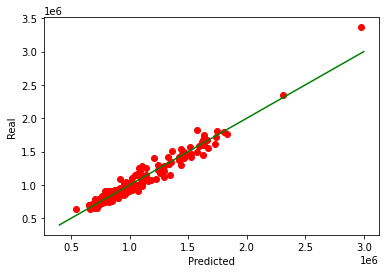

In [22]:
# Plotting graph between real and predicted values
plt.plot(y_pred,y_test,'ro')
plt.plot([400000,3000000],[400000,3000000], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

#### Comparing some of the individual `y_test` and the corresponding `y_pred` values 

In [23]:
# Comparing some of the individual actual values (y_test) with their respective predicted values (y_pred)
for i in range(50):
    print(f"y_test[{i}]: {y_test[i]:10,.0f}    y_pred[{i}]: {y_pred[i]:10,.0f}   Difference (% of y_test): {((y_pred[i]-y_test[i])/y_test[i])*100:6.2f}%")

y_test[0]:    920,000    y_pred[0]:    935,028   Difference (% of y_test):   1.63%
y_test[1]:    769,000    y_pred[1]:    746,892   Difference (% of y_test):  -2.87%
y_test[2]:    880,000    y_pred[2]:    851,212   Difference (% of y_test):  -3.27%
y_test[3]:    781,200    y_pred[3]:    781,324   Difference (% of y_test):   0.02%
y_test[4]:  1,500,000    y_pred[4]:  1,574,492   Difference (% of y_test):   4.97%
y_test[5]:    982,222    y_pred[5]:    957,996   Difference (% of y_test):  -2.47%
y_test[6]:    885,000    y_pred[6]:    880,588   Difference (% of y_test):  -0.50%
y_test[7]:    700,000    y_pred[7]:    649,580   Difference (% of y_test):  -7.20%
y_test[8]:    800,000    y_pred[8]:    756,300   Difference (% of y_test):  -5.46%
y_test[9]:    685,000    y_pred[9]:    712,684   Difference (% of y_test):   4.04%
y_test[10]:    915,000    y_pred[10]:    849,612   Difference (% of y_test):  -7.15%
y_test[11]:    878,000    y_pred[11]:    891,180   Difference (% of y_test):   1.50%
